In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure this line is included
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
import plotly.express as px

cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

df = pd.read_csv("CSCS_data_anon.csv")

/tmp/ipykernel_153/3281361276.py:16: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CSCS_data_anon.csv",
/tmp/ipykernel_153/3281361276.py:23: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CSCS_data_anon.csv")


In [2]:
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape

(10018, 1779)

# Question 1

In [3]:
print(dataV2['DEMO_age'].count())
print(dataV2['CONNECTION_social_time_friends_p7d'].count())
print(dataV2['LONELY_chronic_lonely_others'].count()) #var 930 and 2022 cross

9541
5302
493


In [4]:
# Filter for the 2022 Cross-Sectional dataset
filtered_data = dataV2[dataV2['DATASET'] == '2022 Cross-Sectional']

Age_2022_Data = dataV2[dataV2['DATASET'] == '2022 Cross-Sectional']
Age_2022_Data = Age_2022_Data['DEMO_age']

# Get the value counts for DEMO_age in this filtered dataset
age_counts = filtered_data['DEMO_age'].count()

print(age_counts)

3419


In [5]:
Age_2022_Data = Age_2022_Data.dropna()
Age_2022_Data

0        71.0
1        69.0
2        56.0
5        55.0
7        52.0
         ... 
11421    62.0
11422    50.0
11423    64.0
11424    68.0
11427    36.0
Name: DEMO_age, Length: 3419, dtype: float64

In [6]:
# Filter for the 2022 Cross-Sectional dataset
filtered_data = data[data['DATASET'] == '2022 Cross-Sectional']

Social_Time_2022_Data = data[data['DATASET'] == '2022 Cross-Sectional']
Social_Time_2022_Data = Social_Time_2022_Data['CONNECTION_social_time_friends_p7d']

# Get the value counts for DEMO_age in this filtered dataset
time_counts = filtered_data['CONNECTION_social_time_friends_p7d'].count()

print(time_counts)

2817


In [7]:
Social_Time_2022_Data = Social_Time_2022_Data.dropna()
Social_Time_2022_Data

0        6.0
1        4.0
2        9.0
5        3.0
7        0.0
        ... 
11420    3.0
11421    0.0
11422    1.0
11423    4.0
11427    2.0
Name: CONNECTION_social_time_friends_p7d, Length: 2817, dtype: float64

In [8]:
# Filter for the 2022 Cross-Sectional dataset
filtered_data = data[data['DATASET'] == '2022 Cross-Sectional']

Lonely_2022_Data = data[data['DATASET'] == '2022 Cross-Sectional']
Lonely_2022_Data = Lonely_2022_Data['LONELY_dejong_emotional_social_loneliness_scale_emptiness']

# Get the value counts for DEMO_age in this filtered dataset
lonely_counts = filtered_data['LONELY_dejong_emotional_social_loneliness_scale_emptiness'].count()

#print(lonely_counts)

print(Lonely_2022_Data.value_counts())

LONELY_dejong_emotional_social_loneliness_scale_emptiness
No              1057
More or less     879
Yes              754
Name: count, dtype: int64


In [9]:
Lonely_2022_Data = Lonely_2022_Data.replace({'More or less': 'Yes_or_More_or_Less', 'Yes': 'Yes_or_More_or_Less'})

In [10]:
Lonely_2022_Data.value_counts()

LONELY_dejong_emotional_social_loneliness_scale_emptiness
Yes_or_More_or_Less    1633
No                     1057
Name: count, dtype: int64

In [11]:
data_filtered = {
    'Age_2022_Data': Age_2022_Data,
    'Social_Time_2022_Data': Social_Time_2022_Data,
    'Lonely_2022_Data': Lonely_2022_Data
}

compiled_data = pd.DataFrame(data_filtered)

In [12]:
compiled_data = compiled_data.dropna()

In [13]:
compiled_data.value_counts()

Age_2022_Data  Social_Time_2022_Data  Lonely_2022_Data   
28.0           10.0                   Yes_or_More_or_Less    56
61.0           0.0                    Yes_or_More_or_Less    17
58.0           0.0                    Yes_or_More_or_Less    14
57.0           0.0                    Yes_or_More_or_Less    14
62.0           0.0                    Yes_or_More_or_Less    13
                                                             ..
40.0           20.0                   No                      1
               24.0                   No                      1
               26.0                   Yes_or_More_or_Less     1
41.0           1.0                    No                      1
90.0           6.0                    No                      1
Name: count, Length: 1131, dtype: int64

In [14]:
# Remove rows where Social_Time_2022_Data >= 50
compiled_data = compiled_data[compiled_data['Social_Time_2022_Data'] < 50]
compiled_data

,Age_2022_Data,Social_Time_2022_Data,Lonely_2022_Data
0,71.0,6.0,Yes_or_More_or_Less
1,69.0,4.0,No
2,56.0,9.0,No
5,55.0,3.0,No
7,52.0,0.0,Yes_or_More_or_Less
...,...,...,...
11414,35.0,2.0,No
11421,62.0,0.0,No
11422,50.0,1.0,No
11423,64.0,4.0,Yes_or_More_or_Less


In [15]:
# Remove rows where Age_2022_Data >= 85
compiled_data = compiled_data[compiled_data['Age_2022_Data'] < 85]
compiled_data

,Age_2022_Data,Social_Time_2022_Data,Lonely_2022_Data
0,71.0,6.0,Yes_or_More_or_Less
1,69.0,4.0,No
2,56.0,9.0,No
5,55.0,3.0,No
7,52.0,0.0,Yes_or_More_or_Less
...,...,...,...
11414,35.0,2.0,No
11421,62.0,0.0,No
11422,50.0,1.0,No
11423,64.0,4.0,Yes_or_More_or_Less


## Part 1: Breakdown of Each Variable

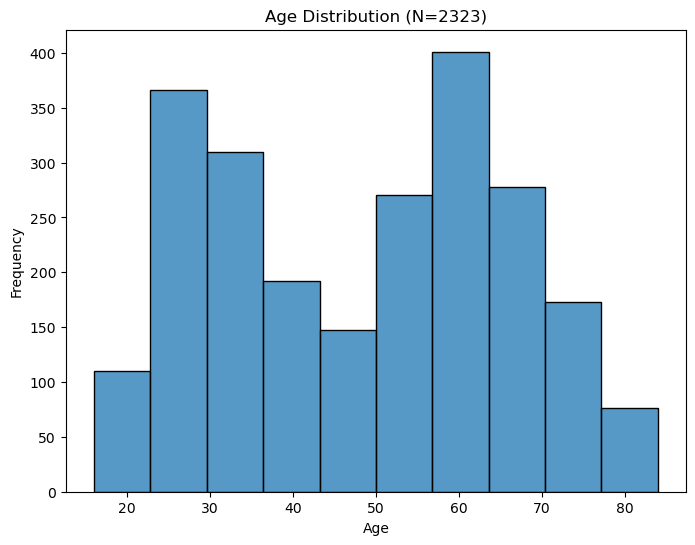

In [16]:
# 1. Histogram for Age_2022_Data
plt.figure(figsize=(8, 6))
sns.histplot(compiled_data['Age_2022_Data'], bins=10, kde=False)
plt.title(f'Age Distribution (N={len(compiled_data["Age_2022_Data"])})')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

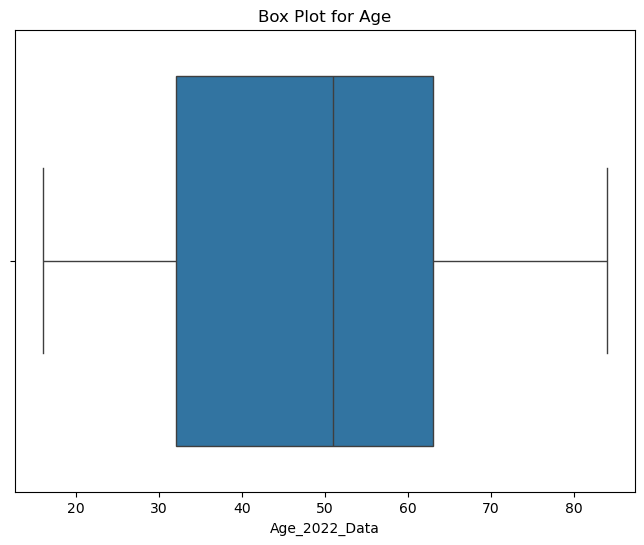

In [17]:
# 2. Box Plot for Age_2022_Data with Statistics
plt.figure(figsize=(8, 6))
sns.boxplot(data=compiled_data, x='Age_2022_Data')
plt.title('Box Plot for Age')

plt.show()

In [18]:
age_summary = {
    'Statistic': ['Mean', 'Median', 'Q1', 'Q3'],
    'Age_2022_Data': [
        compiled_data['Age_2022_Data'].mean(),
        compiled_data['Age_2022_Data'].median(),
        compiled_data['Age_2022_Data'].quantile(0.25),
        compiled_data['Age_2022_Data'].quantile(0.75)
    ]
}

print(age_summary)

{'Statistic': ['Mean', 'Median', 'Q1', 'Q3'], 'Age_2022_Data': [48.393456736978045, 51.0, 32.0, 63.0]}


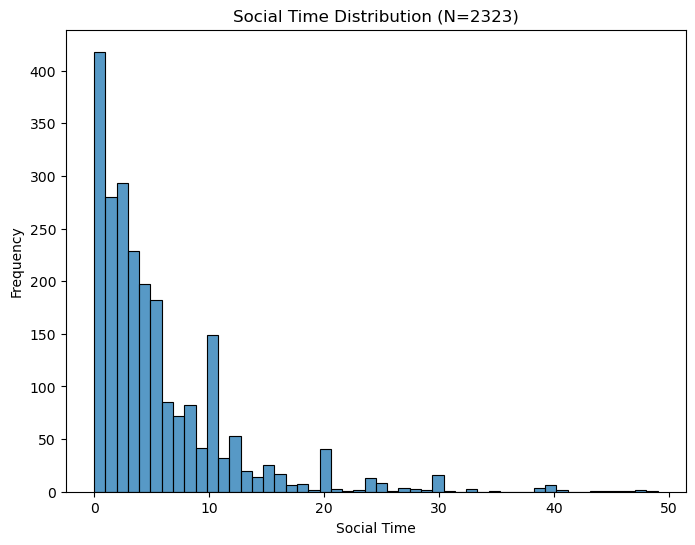

In [19]:
# 3. Histogram for Social_Time_2022_Data
plt.figure(figsize=(8, 6))
sns.histplot(compiled_data['Social_Time_2022_Data'], bins=50, kde=False)
plt.title(f'Social Time Distribution (N={len(compiled_data["Social_Time_2022_Data"])})')
plt.xlabel('Social Time')
plt.ylabel('Frequency')
plt.show()

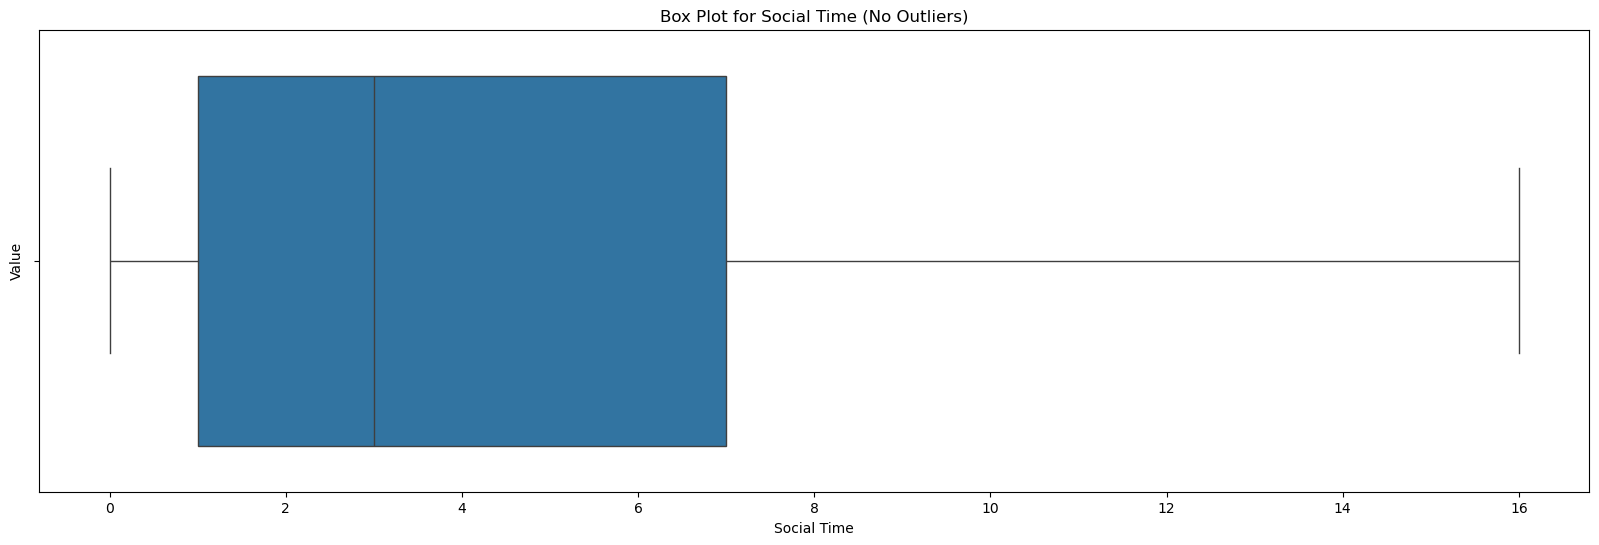

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Box Plot for 'Social_Time_2022_Data', without outliers
plt.figure(figsize=(20, 6))
sns.boxplot(data=compiled_data, x='Social_Time_2022_Data',showfliers=False) #remember to use true too

# Add titles and labels
plt.title('Box Plot for Social Time (No Outliers)')
plt.xlabel('Social Time')
plt.ylabel('Value')

# Show the plot
plt.show()

In [21]:
social_time_summary = {
    'Statistic': ['Mean', 'Median', 'Q1', 'Q3'],
    'Social_Time_2022_Data': [
        compiled_data['Social_Time_2022_Data'].mean(),
        compiled_data['Social_Time_2022_Data'].median(),
        compiled_data['Social_Time_2022_Data'].quantile(0.25),
        compiled_data['Social_Time_2022_Data'].quantile(0.75)
    ]
}

print(social_time_summary)

{'Statistic': ['Mean', 'Median', 'Q1', 'Q3'], 'Social_Time_2022_Data': [5.309944037882049, 3.0, 1.0, 7.0]}


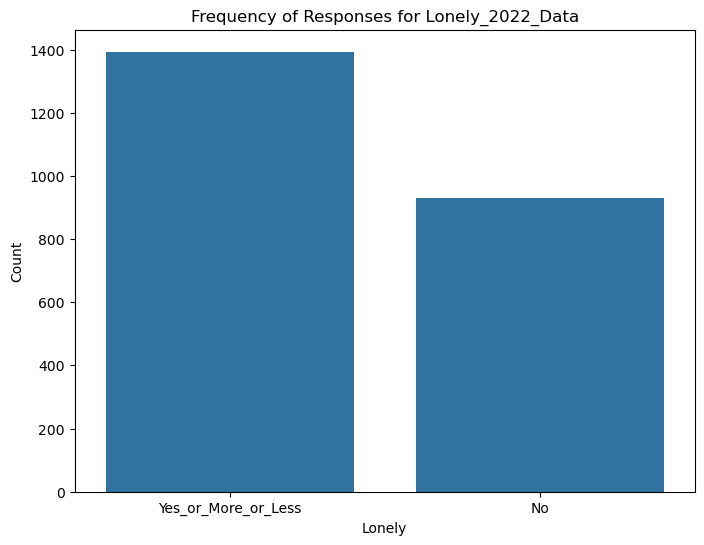

In [22]:
# 7. Bar Plot for Lonely 2022 Data
plt.figure(figsize=(8, 6))
sns.countplot(x='Lonely_2022_Data', data=compiled_data)

# Customize the plot
plt.title('Frequency of Responses for Lonely_2022_Data')
plt.xlabel('Lonely')
plt.ylabel('Count')
plt.show()

In [23]:
#Proportion:

# Count how many "Yes" values exist in the 'Lonely_2022_Data' column
count_yes = (compiled_data['Lonely_2022_Data'] == 'Yes_or_More_or_Less').sum()

print(count_yes)

print('Percentage who are lonely: ', round(count_yes/compiled_data['Lonely_2022_Data'].count() * 100), '%')

1393
Percentage who are lonely:  60 %


## Part 2:

Linear Regression Model on Age v Social Time

In [24]:
# First model: Age v Social Time
age_social_time = 'Social_Time_2022_Data ~ Age_2022_Data' # Formula
age_social_model = smf.ols(formula = age_social_time, data = compiled_data) # Model
fitted_age_social_model = age_social_model.fit() # Model fit

AGE V. SOCIAL TIME
R-squared: 0.07960351957672407

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.4827      0.388     27.006      0.000       9.722      11.244
Age_2022_Data    -0.1069      0.008    -14.168      0.000      -0.122      -0.092


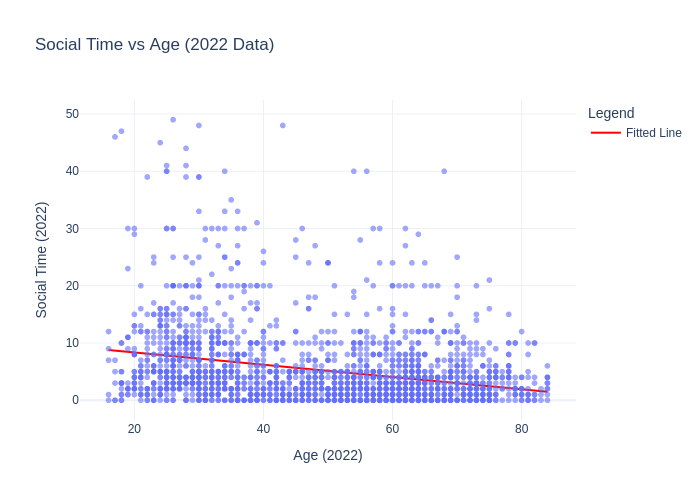

In [25]:
import plotly.express as px

print('AGE V. SOCIAL TIME')
print('R-squared:', fitted_age_social_model.rsquared)
print()
print(fitted_age_social_model.summary().tables[1])

# Scatter plot of the data with regression line
fig = px.scatter(compiled_data,
                 x="Age_2022_Data",
                 y="Social_Time_2022_Data",
                 title="Social Time vs Age (2022 Data)",
                 labels={"Age_2022_Data": "Age", "Social_Time_2022_Data": "Social Time"},
                 opacity=0.6)

# Add regression line (fitted values)
fig.add_scatter(x=compiled_data["Age_2022_Data"],
                y=fitted_age_social_model.fittedvalues,
                mode='lines',
                name='Fitted Line',
                line=dict(color='red'))

# Customize layout for clarity
fig.update_layout(
    xaxis_title="Age (2022)",
    yaxis_title="Social Time (2022)",
    legend_title="Legend",
    template="plotly_white"
)

# Show the plot
fig.show(renderer = 'png')

Age v.s Proportion of Loneliness

R-squared: 0.5676047190135337

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8622      0.033     26.059      0.000       0.796       0.928
Age_2022_Data    -0.0058      0.001     -9.378      0.000      -0.007      -0.005


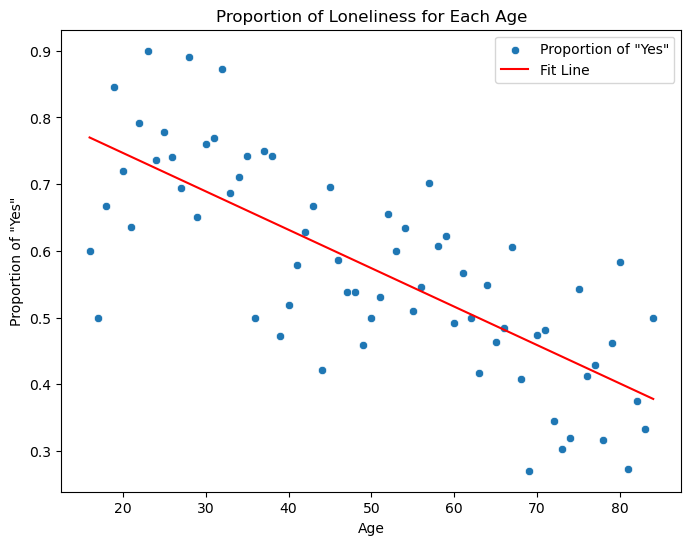

In [26]:
# Calculate the proportion of "yes" for each age
age_proportions = compiled_data.groupby('Age_2022_Data')['Lonely_2022_Data'].apply(lambda x: (x == 'Yes_or_More_or_Less').mean()).reset_index()

# Define the formula and model
age_social_time = 'Lonely_2022_Data ~ Age_2022_Data'
model_spec = smf.ols(formula=age_social_time, data=age_proportions)
fitted_model = model_spec.fit()

# Get the predictions from the model
predictions = fitted_model.predict(age_proportions)

# Plot the proportions and the fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_2022_Data', y='Lonely_2022_Data', data=age_proportions, label='Proportion of "Yes"')
plt.plot(age_proportions['Age_2022_Data'], predictions, color='red', label='Fit Line')

print('R-squared:', fitted_model.rsquared)
print()
print(fitted_model.summary().tables[1])

# Titles and labels
plt.title('Proportion of Loneliness for Each Age')
plt.xlabel('Age')
plt.ylabel('Proportion of "Yes"')
plt.legend()
plt.show()

Social Time v.s Proportion of Loneliness

R-squared: 0.0019143359616979883

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6385      0.084      7.593      0.000       0.469       0.808
Social_Time_2022_Data    -0.0009      0.003     -0.280      0.781      -0.007       0.005


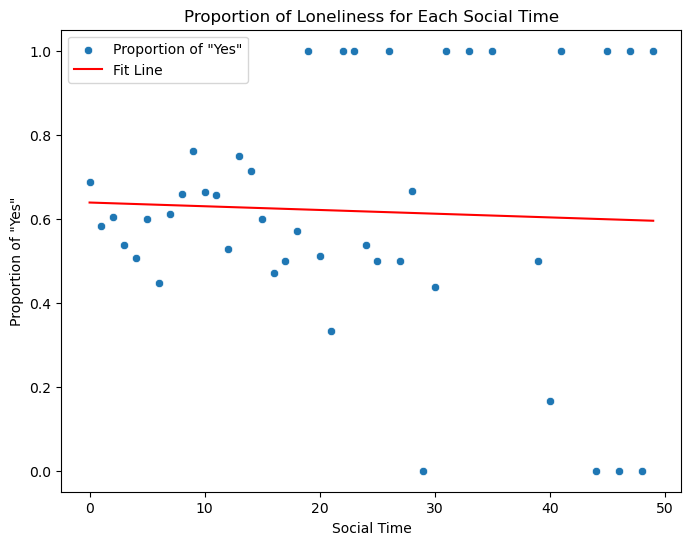

In [27]:
# Calculate the proportion of "yes" for each social time spent
social_time_proportions = compiled_data.groupby('Social_Time_2022_Data')['Lonely_2022_Data'].apply(lambda x: (x == 'Yes_or_More_or_Less').mean()).reset_index()

# Define the formula and model (using Social Time instead of Age)
social_time_formula = 'Lonely_2022_Data ~ Social_Time_2022_Data'
model_spec = smf.ols(formula=social_time_formula, data=social_time_proportions)
fitted_model = model_spec.fit()

# Get the predictions from the model
predictions = fitted_model.predict(social_time_proportions)

# Plot the proportions and the fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Social_Time_2022_Data', y='Lonely_2022_Data', data=social_time_proportions, label='Proportion of "Yes"')
plt.plot(social_time_proportions['Social_Time_2022_Data'], predictions, color='red', label='Fit Line')

print('R-squared:', fitted_model.rsquared)
print()
print(fitted_model.summary().tables[1])

# Titles and labels
plt.title('Proportion of Loneliness for Each Social Time')
plt.xlabel('Social Time')
plt.ylabel('Proportion of "Yes"')
plt.legend()
plt.show()


## Part 3: Statistical Analysis

In [28]:
import statsmodels.formula.api as smf

In [29]:
compiled_data['Lonely_2022_Binary'] = compiled_data['Lonely_2022_Data'].apply(lambda x: 0 if x == 'No' else 1)

/tmp/ipykernel_153/490588406.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
compiled_data.value_counts()

Age_2022_Data  Social_Time_2022_Data  Lonely_2022_Data     Lonely_2022_Binary
28.0           10.0                   Yes_or_More_or_Less  1                     56
61.0           0.0                    Yes_or_More_or_Less  1                     17
58.0           0.0                    Yes_or_More_or_Less  1                     14
57.0           0.0                    Yes_or_More_or_Less  1                     14
62.0           0.0                    Yes_or_More_or_Less  1                     13
                                                                                 ..
40.0           9.0                    Yes_or_More_or_Less  1                      1
               10.0                   Yes_or_More_or_Less  1                      1
               11.0                   Yes_or_More_or_Less  1                      1
               20.0                   No                   0                      1
84.0           6.0                    No                   0                      

**Without Interaction**

In [31]:
model1_spec = smf.logit(formula='Lonely_2022_Binary ~ Social_Time_2022_Data + Age_2022_Data', data=compiled_data)

In [32]:
model1_fit = model1_spec.fit()

Optimization terminated successfully.
         Current function value: 0.636111
         Iterations 5


In [33]:
model1_fit.predict(compiled_data)

0        0.410094
1        0.445192
2        0.509318
5        0.573594
7        0.625210
           ...   
11414    0.734685
11421    0.542268
11422    0.632432
11423    0.487754
11427    0.727961
Length: 2323, dtype: float64

In [34]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                 2323
Model:                          Logit   Df Residuals:                     2320
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.05503
Time:                        23:40:10   Log-Likelihood:                -1477.7
converged:                       True   LL-Null:                       -1563.7
Covariance Type:            nonrobust   LLR p-value:                 4.276e-38
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2914      0.160     14.364      0.000       1.979       2.604
Social_Time_2022_Data    -0.0375      0.007     -5.440      0.000      -0.051      -0.024
Age_2022_Data            -0.0342      0.003    -12.496      0.000      -0.040      -0.029
=========================================================================================
"""

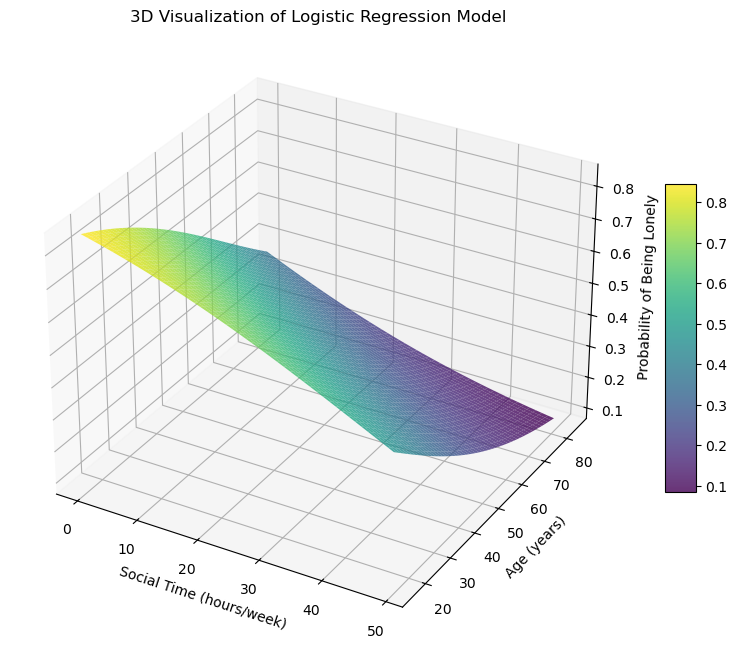

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data['Social_Time_2022_Data'].min(),
                                compiled_data['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data['Age_2022_Data'].min(),
                        compiled_data['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model1_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

**With interaction**

In [36]:
model2_spec = smf.logit(formula='Lonely_2022_Binary ~ Social_Time_2022_Data + Age_2022_Data + Social_Time_2022_Data * Age_2022_Data', data=compiled_data)

In [37]:
model2_fit = model2_spec.fit()

Optimization terminated successfully.
         Current function value: 0.632277
         Iterations 5


In [38]:
model2_fit.predict(compiled_data)

0        0.377467
1        0.440503
2        0.460589
5        0.571238
7        0.637249
           ...   
11414    0.717641
11421    0.577485
11422    0.635565
11423    0.481206
11427    0.711740
Length: 2323, dtype: float64

In [39]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                 2323
Model:                          Logit   Df Residuals:                     2319
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.06072
Time:                        23:40:10   Log-Likelihood:                -1468.8
converged:                       True   LL-Null:                       -1563.7
Covariance Type:            nonrobust   LLR p-value:                 6.413e-41
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.8686      0.188      9.933      0.000       1.500       2.237
Social_Time_2022_Data                   0.0386      0.020      1.917      0.055      -0.001       0.078
Age_2022_Data                          -0.0251      0.003     -7.187      0.000      -0.032      -0.018
Social_Time_2022_Data:Age_2022_Data    -0.0019      0.000     -4.028      0.000      -0.003      -0.001
=======================================================================================================
"""

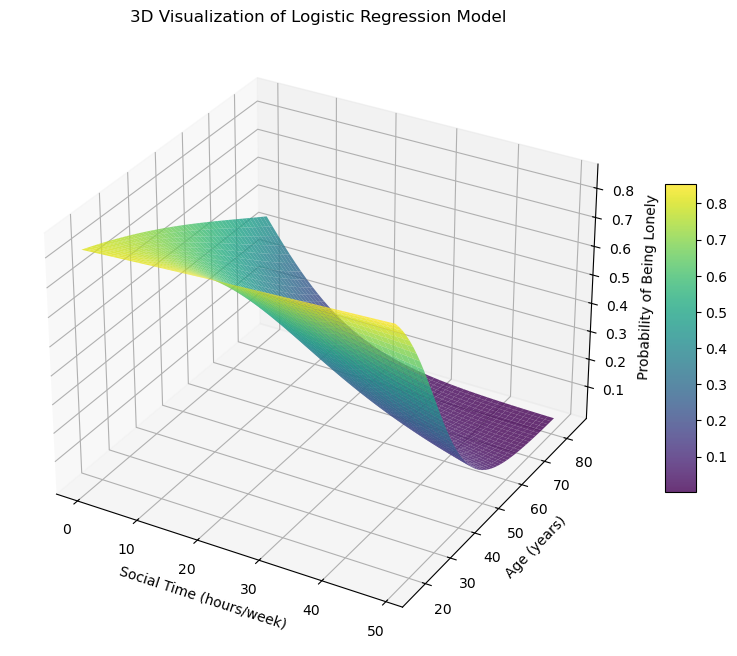

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data['Social_Time_2022_Data'].min(),
                                compiled_data['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data['Age_2022_Data'].min(),
                        compiled_data['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model2_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

With scale:

In [41]:
model3_spec = smf.logit(formula='Lonely_2022_Binary ~ scale(Social_Time_2022_Data) + scale(Age_2022_Data) + scale(Social_Time_2022_Data * Age_2022_Data)', data=compiled_data)

In [42]:
model3_fit = model3_spec.fit()

Optimization terminated successfully.
         Current function value: 0.632277
         Iterations 5


In [43]:
model3_fit.predict(compiled_data)

0        0.377467
1        0.440503
2        0.460589
5        0.571238
7        0.637249
           ...   
11414    0.717641
11421    0.577485
11422    0.635565
11423    0.481206
11427    0.711740
Length: 2323, dtype: float64

In [44]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                 2323
Model:                          Logit   Df Residuals:                     2319
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.06072
Time:                        23:40:11   Log-Likelihood:                -1468.8
converged:                       True   LL-Null:                       -1563.7
Covariance Type:            nonrobust   LLR p-value:                 6.413e-41
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.4278      0.044      9.634      0.000       0.341       0.515
scale(Social_Time_2022_Data)                     0.2552      0.133      1.917      0.055      -0.006       0.516
scale(Age_2022_Data)                            -0.4385      0.061     -7.187      0.000      -0.558      -0.319
scale(Social_Time_2022_Data * Age_2022_Data)    -0.5293      0.131     -4.028      0.000      -0.787      -0.272
================================================================================================================
"""

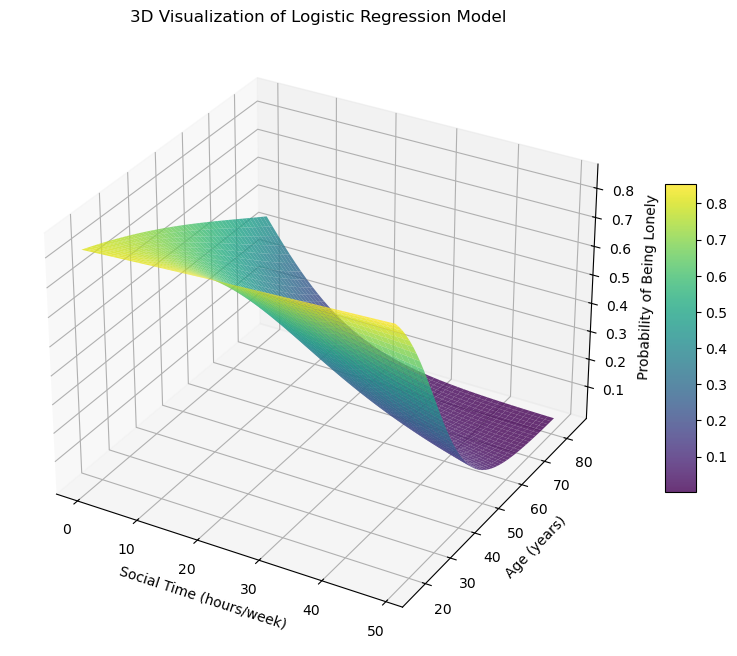

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data['Social_Time_2022_Data'].min(),
                                compiled_data['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data['Age_2022_Data'].min(),
                        compiled_data['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model3_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Model focused on seniors

In [46]:
compiled_data_seniors = compiled_data[compiled_data['Age_2022_Data'] > 60]

In [47]:
compiled_data_seniors

,Age_2022_Data,Social_Time_2022_Data,Lonely_2022_Data,Lonely_2022_Binary
0,71.0,6.0,Yes_or_More_or_Less,1
1,69.0,4.0,No,0
27,71.0,1.0,Yes_or_More_or_Less,1
49,77.0,5.0,Yes_or_More_or_Less,1
50,75.0,2.0,Yes_or_More_or_Less,1
...,...,...,...,...
11369,64.0,3.0,Yes_or_More_or_Less,1
11382,69.0,8.0,No,0
11400,63.0,2.0,Yes_or_More_or_Less,1
11421,62.0,0.0,No,0


In [48]:
model4_spec = smf.logit(formula='Lonely_2022_Binary ~ scale(Social_Time_2022_Data) + scale(Age_2022_Data) + scale(Social_Time_2022_Data * Age_2022_Data)', data=compiled_data_seniors)

In [49]:
model4_fit = model4_spec.fit()

Optimization terminated successfully.
         Current function value: 0.669379
         Iterations 5


In [50]:
model4_fit.predict(compiled_data_seniors)

0        0.372008
1        0.434721
27       0.496484
49       0.351458
50       0.449060
           ...   
11369    0.489904
11382    0.344254
11400    0.515249
11421    0.556944
11423    0.470119
Length: 724, dtype: float64

In [51]:
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                  724
Model:                          Logit   Df Residuals:                      720
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.02846
Time:                        23:40:11   Log-Likelihood:                -484.63
converged:                       True   LL-Null:                       -498.83
Covariance Type:            nonrobust   LLR p-value:                 3.006e-06
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.2023      0.077     -2.640      0.008      -0.352      -0.052
scale(Social_Time_2022_Data)                     0.5791      1.188      0.487      0.626      -1.749       2.907
scale(Age_2022_Data)                            -0.0945      0.102     -0.927      0.354      -0.294       0.105
scale(Social_Time_2022_Data * Age_2022_Data)    -0.9932      1.194     -0.832      0.405      -3.332       1.346
================================================================================================================
"""

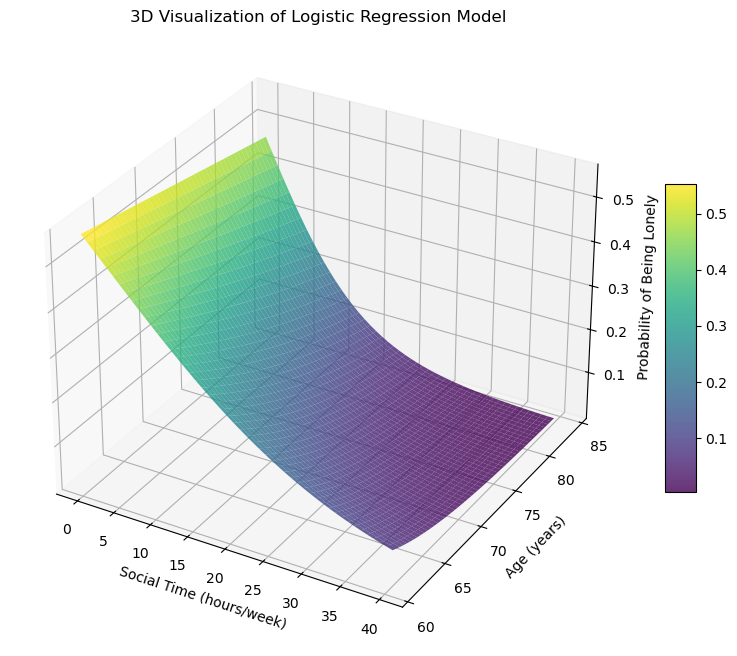

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data_seniors['Social_Time_2022_Data'].min(),
                                compiled_data_seniors['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data_seniors['Age_2022_Data'].min(),
                        compiled_data_seniors['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model4_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [53]:
compiled_data_seniors['Social_Time_2022_Data'].mean()

3.505524861878453

Teens to Young Adults:

In [54]:
compiled_data_young = compiled_data[
    (compiled_data['Age_2022_Data'] < 35) &
    (compiled_data['Age_2022_Data'] > 16)
]


In [55]:
compiled_data_young['Social_Time_2022_Data'].mean()

8.10593220338983

In [56]:
model5_spec = smf.logit(formula='Lonely_2022_Binary ~ scale(Social_Time_2022_Data) + scale(Age_2022_Data) + scale(Social_Time_2022_Data * Age_2022_Data)', data=compiled_data_young)

In [57]:
model5_fit = model5_spec.fit()

Optimization terminated successfully.
         Current function value: 0.539498
         Iterations 5


In [58]:
model5_fit.predict(compiled_data_young)

34       0.764498
45       0.564924
56       0.781800
57       0.762699
132      0.741515
           ...   
11348    0.769271
11349    0.791502
11353    0.782856
11362    0.784744
11384    0.791540
Length: 708, dtype: float64

In [59]:
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                  708
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                0.006334
Time:                        23:40:12   Log-Likelihood:                -381.96
converged:                       True   LL-Null:                       -384.40
Covariance Type:            nonrobust   LLR p-value:                    0.1816
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        1.1993      0.089     13.401      0.000       1.024       1.375
scale(Social_Time_2022_Data)                    -0.4695      0.476     -0.987      0.324      -1.402       0.463
scale(Age_2022_Data)                            -0.0168      0.119     -0.142      0.887      -0.249       0.216
scale(Social_Time_2022_Data * Age_2022_Data)     0.3044      0.484      0.629      0.529      -0.644       1.253
================================================================================================================
"""

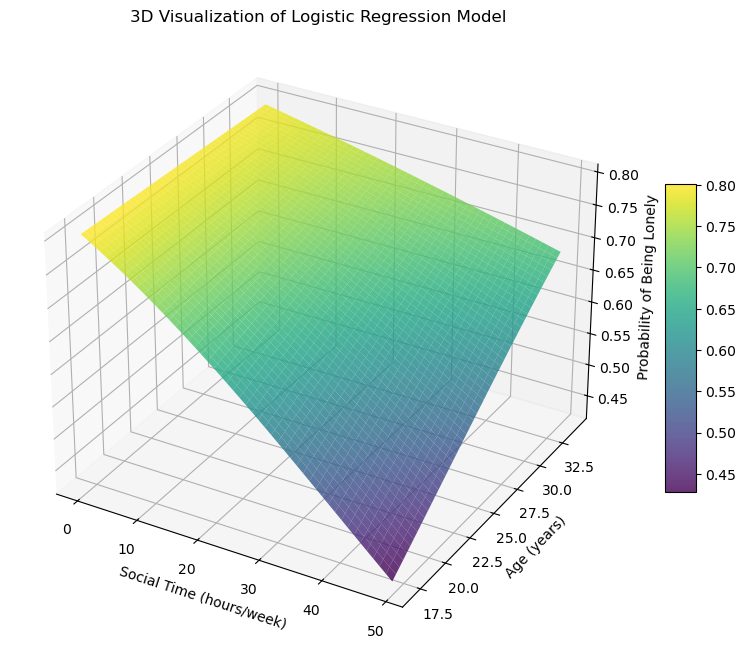

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data_young['Social_Time_2022_Data'].min(),
                                compiled_data_young['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data_young['Age_2022_Data'].min(),
                        compiled_data_young['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model5_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

# Question 2

Is there a relationship between the amount of videogames played and the sense of having close individuals one can trust? Alternatively, is the amount of videogames played a good indicator of this sense of closeness to other people?

### Preparing the data

In [61]:
dataV2.CONNECTION_activities_onlinegames_p3m.value_counts()

CONNECTION_activities_onlinegames_p3m
Not in the past three months    1374
A few times a month              461
Weekly                           438
Monthly                          336
A few times a week               278
Less than monthly                265
Daily or almost daily            226
Name: count, dtype: int64

In [62]:
print(dataV2.LONELY_dejong_emotional_social_loneliness_scale_close.value_counts())
dataV2.DEMO_age

LONELY_dejong_emotional_social_loneliness_scale_close
Yes             3177
More or less    2713
No              1859
Name: count, dtype: int64


0        71.0
1        69.0
2        56.0
3        54.0
4        30.0
         ... 
11425    45.0
11426    45.0
11427    36.0
11428     NaN
11430    31.0
Name: DEMO_age, Length: 10018, dtype: float64

In [63]:
data_close_videogames = dataV2[['CONNECTION_activities_onlinegames_p3m',
                               'LONELY_dejong_emotional_social_loneliness_scale_close',
                              'DEMO_age']]

data_close_videogames_clean = data_close_videogames.dropna()
data_close_videogames_clean

,CONNECTION_activities_onlinegames_p3m,LONELY_dejong_emotional_social_loneliness_scale_close,DEMO_age
4,A few times a week,Yes,30.0
8,Not in the past three months,No,66.0
10,Daily or almost daily,Yes,27.0
13,Not in the past three months,Yes,48.0
18,Less than monthly,More or less,50.0
...,...,...,...
11396,Not in the past three months,No,62.0
11398,Daily or almost daily,No,65.0
11407,A few times a month,More or less,40.0
11410,A few times a month,Yes,35.0


In [64]:
data_close_videogames_clean['close_people_2022'] = data[
    'LONELY_dejong_emotional_social_loneliness_scale_close'].apply(
    lambda x: 'Yes' if x in ['More or less', 'Yes'] else 'No'
)

data_close_videogames_clean = data_close_videogames_clean.rename(columns={'CONNECTION_activities_onlinegames_p3m': 'P3m_videogames_2022',
                                           'DEMO_age': 'Age_2022'})

data_close_videogames_clean.drop(columns = ['LONELY_dejong_emotional_social_loneliness_scale_close'], inplace=True)

data_close_videogames_clean['close_people_2022_binary'] = data_close_videogames_clean[
    'close_people_2022'].apply(lambda x: 1 if x in ['Yes'] else 0)

/tmp/ipykernel_153/838919003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Some data visualization

In [65]:
print(data_close_videogames_clean.close_people_2022.value_counts())
print(data_close_videogames_clean.close_people_2022_binary.value_counts())

close_people_2022
Yes    2233
No      440
Name: count, dtype: int64
close_people_2022_binary
1    2233
0     440
Name: count, dtype: int64


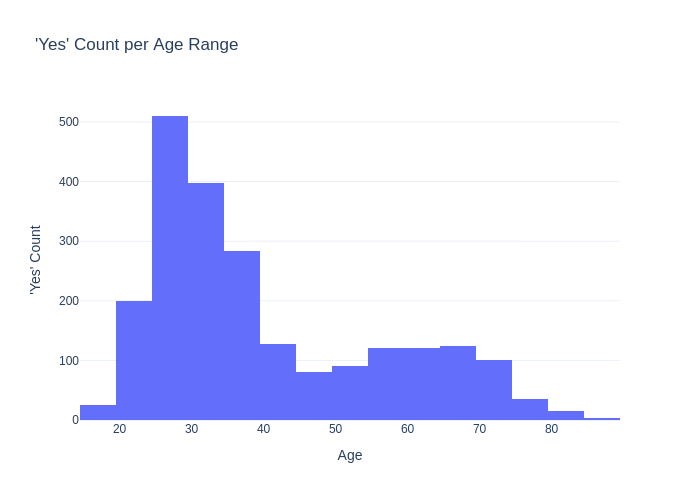

In [66]:
# Filter the data to include only rows where close_people_2022_binary == 1
filtered_data = data_close_videogames_clean[data_close_videogames_clean['close_people_2022_binary'] == 1]

# Create the histogram
fig = px.histogram(filtered_data,
                   x='Age_2022',
                   title="'Yes' Count per Age Range",
                   labels={'Age_2022': 'Age', 'count': "Count of '1's"},
                   nbins=20)  # Adjust nbins to control granularity

# Customize the layout
fig.update_layout(template='plotly_white',
                  xaxis_title='Age',
                  yaxis_title="'Yes' Count")

# Show the plot
fig.show(renderer = 'png')

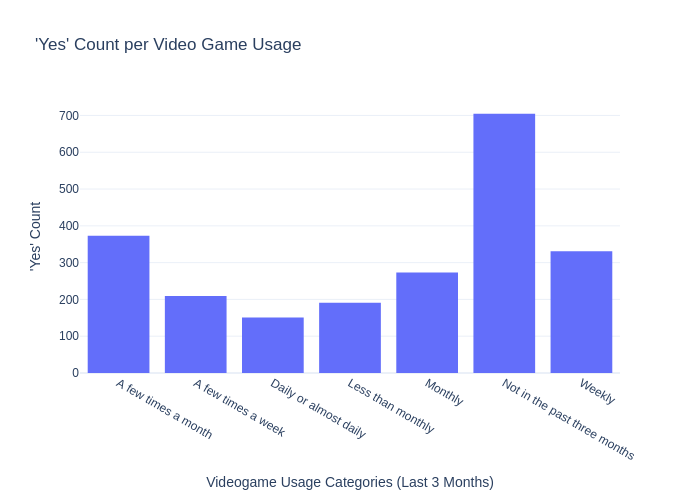

In [67]:
# Filter the data to include only rows where close_people_2022_binary == 1
filtered_data = data_close_videogames_clean[data_close_videogames_clean['close_people_2022_binary'] == 1]

# Create the histogram
fig = px.histogram(filtered_data,
                   x='P3m_videogames_2022',
                   title="'Yes' Count per Video Game Usage",
                   labels={'P3m_videogames_2022': 'Videogame Categories', 'count': "Count of '1's"},
                   category_orders={'P3m_videogames_2022': sorted(filtered_data['P3m_videogames_2022'].unique())})  # Optional: sort categories

# Customize the layout
fig.update_layout(template='plotly_white',
                  xaxis_title='Videogame Usage Categories (Last 3 Months)',
                  yaxis_title="'Yes' Count")

# Show the plot
fig.show(renderer = 'png')

/tmp/ipykernel_153/2508650203.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



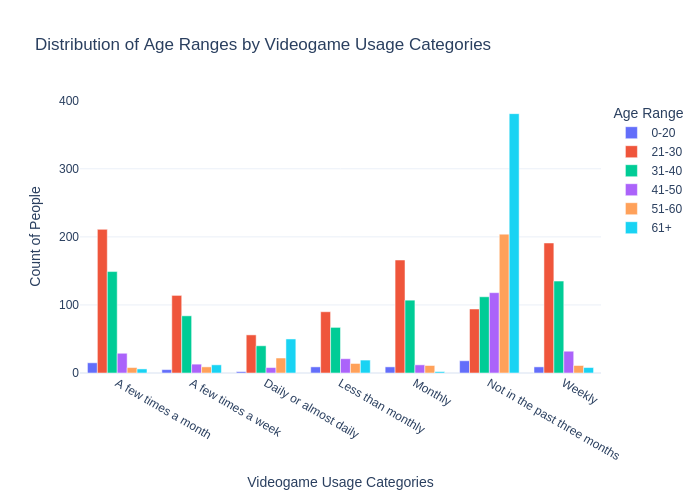

In [68]:
# Group the data by videogame category and age range
# Create age bins for better visualization
data_close_videogames_clean['Age_Range'] = pd.cut(
    data_close_videogames_clean['Age_2022'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
)

# Count occurrences within each category and age range
grouped_data = data_close_videogames_clean.groupby(['P3m_videogames_2022', 'Age_Range']).size().reset_index(name='Count')

# Create the grouped bar chart
fig = px.bar(grouped_data,
             x='P3m_videogames_2022',
             y='Count',
             color='Age_Range',
             barmode='group',
             title='Distribution of Age Ranges by Videogame Usage Categories',
             labels={'P3m_videogames_2022': 'Videogame Usage Categories (Last 3 Months)',
                     'Count': 'Number of People',
                     'Age_Range': 'Age Range'})

# Customize the layout
fig.update_layout(template='plotly_white',
                  xaxis_title='Videogame Usage Categories',
                  yaxis_title='Count of People',
                  legend_title='Age Range')

# Show the plot
fig.show(renderer = 'png')


### Model building, utilizing train-test and scikit learn

##### Model 1

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validated accuracy: 0.8400358948543414
Confusion Matrix:
 [[  0 101]
 [  0 434]]
Accuracy: 0.811


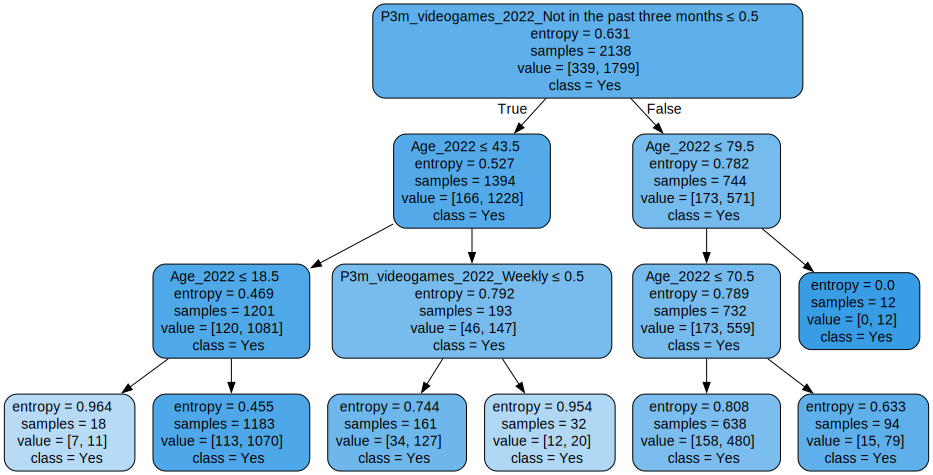

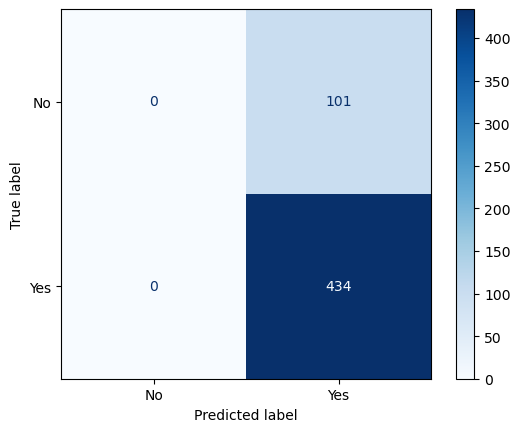

In [69]:
# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

##### Model 2 with weighted classes

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.615526713213246
Confusion Matrix:
 [[ 52  49]
 [162 272]]
Accuracy: 0.606


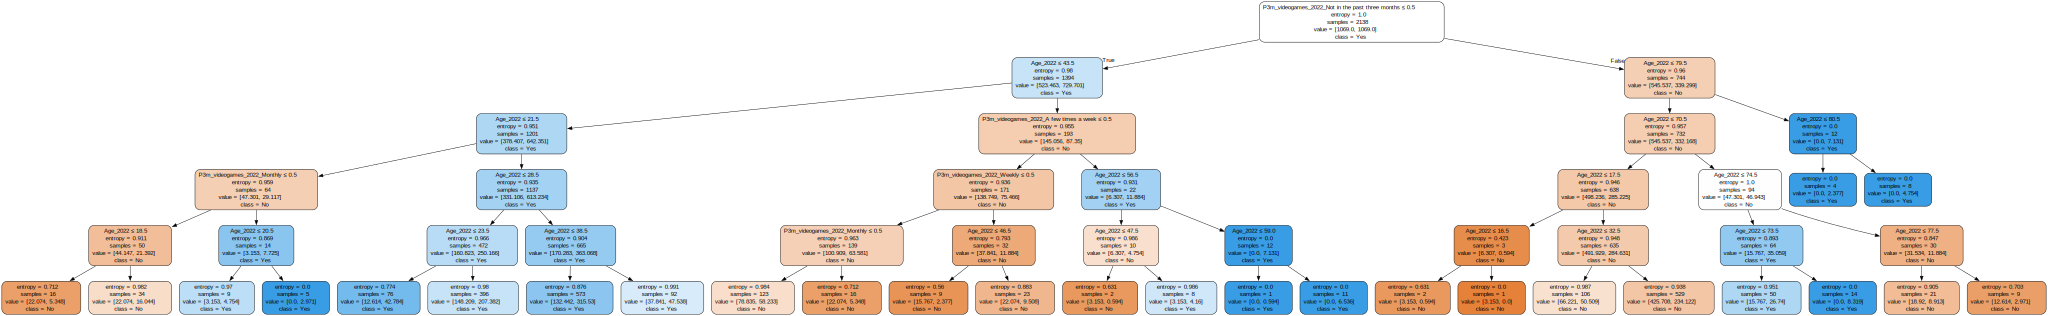

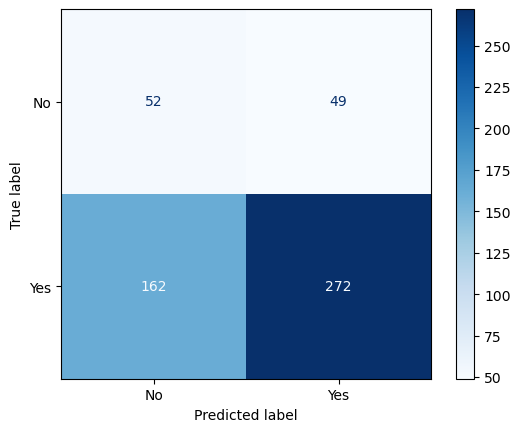

In [70]:
# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

##### Model 2 Age Range 0 to 35

(1418, 5)
(2673, 5)
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validated accuracy: 0.826278659611993
Confusion Matrix:
 [[  8  31]
 [ 30 215]]
Accuracy: 0.785


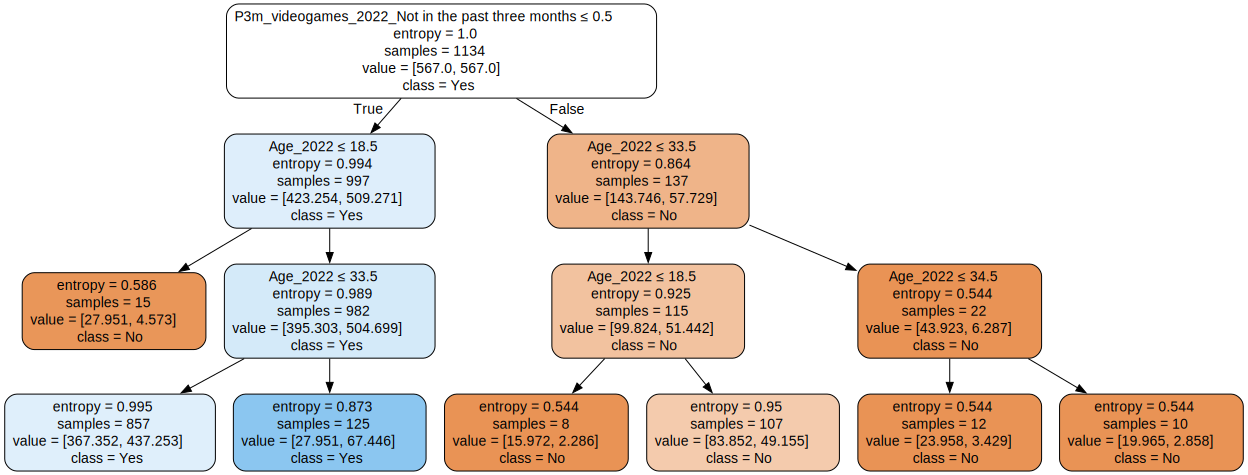

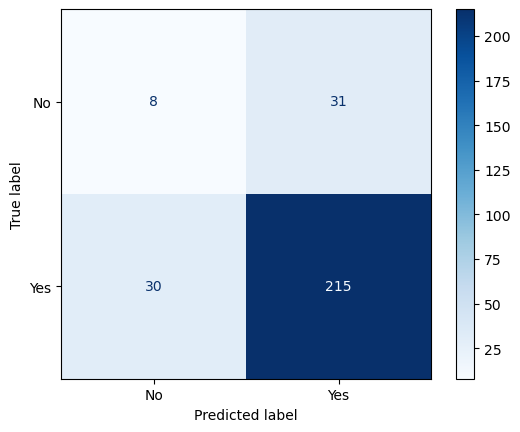

In [71]:
data_close_videogames_clean_filtered = data_close_videogames_clean[data_close_videogames_clean['Age_2022'] <= 35]
print(data_close_videogames_clean_filtered.shape)
print(data_close_videogames_clean.shape)

# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean_filtered, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

##### Model 2 Age Range 35 and above

(1418, 5)
(2673, 5)
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.5367533589537343
Confusion Matrix:
 [[ 31  16]
 [133  71]]
Accuracy: 0.406


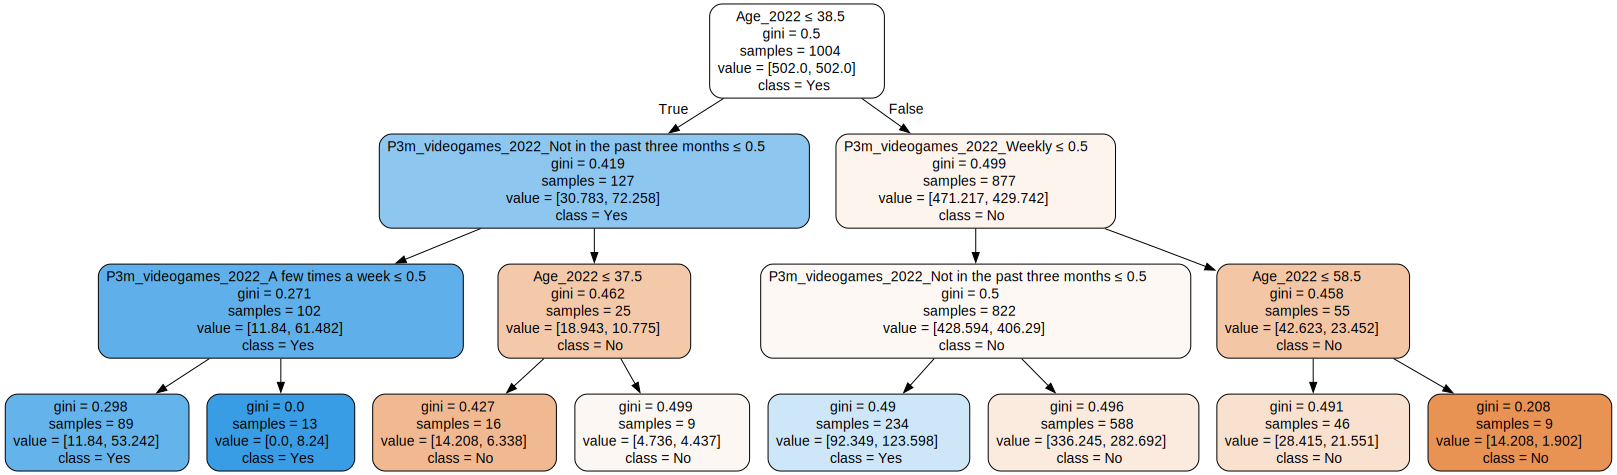

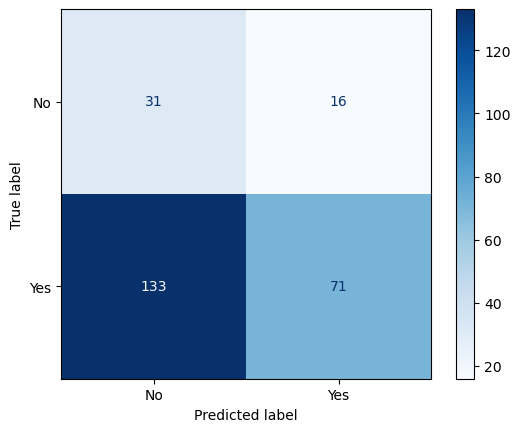

In [72]:
data_close_videogames_clean_filtered_v2 = data_close_videogames_clean[data_close_videogames_clean['Age_2022'] > 35]
print(data_close_videogames_clean_filtered.shape)
print(data_close_videogames_clean.shape)

# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean_filtered_v2, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph